# HDDT Visualisations - CEDA bigraph #

## This project explores 4 of 5 foundation societies recognised by RAI and 1 'Origin' society add by me. ##

| Society | abv. | Dates
| --- | --- | --- |
| Quaker Committee on the Aborigines* | QCA | 1832/37 - 1846 |
| Aborigines Protection Society | APS | 1837 - 1919 |
| Ethnological Society of London | ESL | 1843 - 1871 |
| Anthropological Society of London | ASL | 1863 - 1871 |
| Anthropological Institute | AI | 1843 - 1871 |
| London Anthropological Society** | LAS | 1873 - 1874 |

* Origin Society included in this project but not recognised by RAI.
** not included in this project (beyond 1871 cut off date).

In [145]:
import csv
from operator import itemgetter
import networkx as nx
from networkx.algorithms import community #This part of networkx, for community detection, needs to be imported separately.
import nbconvert
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 6)
import numpy as np


<img src="ceda.png">

## The Quaker Committee on the Aborigines (QCA)  1837 -1846 ##

The Quaker committee on the Aborigines, was a Quaker Committee of Enquiry. A committee formed by, and exclusively manned by Quakers. It met, performed its enquiries and  reported its findings and recommendations to the Quaker Meetings for Sufferings, the standing committee of London Yearly Meeting which was the National Assembly of Quakers in Britain at the time. The committees remit, rules of engagement and characteristics woiuld have been agreed by the national assembly and the committee would no doubt have reported in the manner of Friends. The committee was formed to explore and take up a ‘concern’ amongst Quakers, initially to consider promoting the Gospel amongst the aborigines in 1832 (prompted by similar actions popular at the time among other evangelical churches). But it changed its remit in 1837 to instead take up a philanthropic concern deriving from the group’s increasing awareness through its activities of the plight of aborigines. Therefore, what began as a Quaker Committee of Enquiry to consider promoting the Gospel to Aborigines, soon transformed into the Quaker Committee on the Aborigines, concerned with the plight of the aborigines throughout the colonies, and it’s relief.

In [146]:
qca = pd.read_csv ('vw_4_ceda_qca_quakers_202108162129.csv')

Because there are only 31 members of the QCA wew can iist all of them here.

In [147]:
qca

,Name,birth_year,death_year,first_year,last_year,religion_id
0,Thomas (1) Hodgkin,1798.0,1866.0,1839,1847,1.0
1,William Allen,NaN,NaN,1837,1842,NaN
2,James Bowden,NaN,NaN,1842,1847,1.0
3,William Nash,NaN,NaN,1842,1847,1.0
4,Joseph Sturge,NaN,NaN,1842,1847,1.0
5,William Jun Grimshaw,NaN,NaN,1840,1847,1.0
6,Henry Knight,NaN,NaN,1840,1847,1.0
7,Edward Paull,NaN,NaN,1840,1847,1.0
8,Robert Jun Alsop,NaN,NaN,1837,1847,1.0
9,Abram Rawlinson Barclay,NaN,NaN,1837,1839,1.0


We can plot the number of joiners in each year. New members joined only in the years 1837, 1839, 1840 and 1842. We know that the QCA was established in 1837, so there were only three years when new members joined.

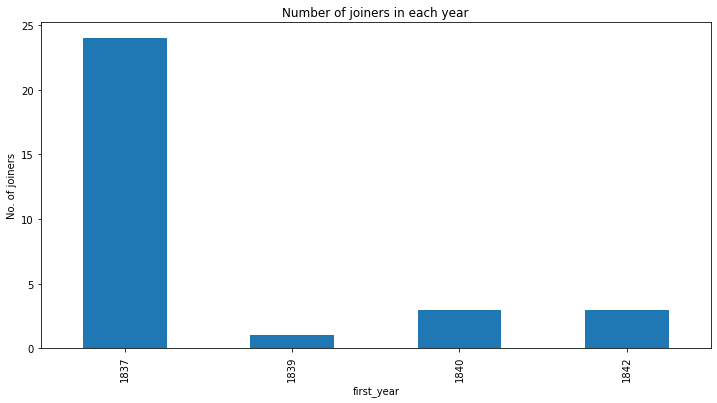

In [148]:
qca.groupby('first_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of joiners in each year")
plt.ylabel ("No. of joiners")
plt.show()

Because new members group in specific years, we chart the number of leavers in each year. Members left in 1839, 1842 1nd 1847. we know that the QCA was 'laid down' (disbanded) in 1847 which leaves only two years when members left the committee.

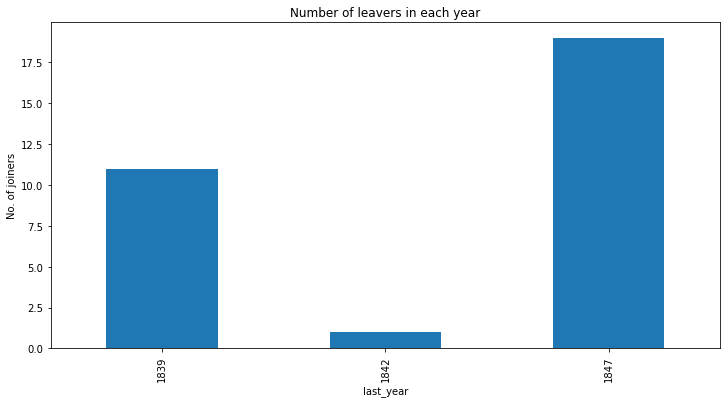

In [181]:
qca.groupby('last_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of leavers in each year")
plt.ylabel ("No. of joiners")
plt.show()

We can elsewhere investigate why in 1839, 11 members left and 1 joined (Thomas Hodgkin). 3 more joined in 1840 and in 1842 1 left and 3 joined.

12 of the original members were members throughout the life of the committee. In any year the majority of members were 'permanent' members.

In [150]:
qca[(qca['first_year'] == 1837) & (qca['last_year'] == 1847)]

,Name,birth_year,death_year,first_year,last_year,religion_id
8,Robert Jun Alsop,NaN,NaN,1837,1847,1.0
12,John Thomas Barry,NaN,NaN,1837,1847,1.0
13,Peter Bedford,NaN,NaN,1837,1847,1.0
17,Josiah Forster,NaN,NaN,1837,1847,1.0
18,Robert Forster,NaN,NaN,1837,1847,1.0
19,William Forster,NaN,NaN,1837,1847,1.0
20,Joseph Talwin Foster,NaN,NaN,1837,1847,1.0
22,Edwd Harris,NaN,NaN,1837,1847,1.0
26,Joseph Neatby,NaN,NaN,1837,1847,1.0
27,John Sanderson,NaN,NaN,1837,1847,1.0


## The Aborigines Protection Society (APS) 1837 -1919 ##

The database contains the names of 1171 members of the APS from its foundation in 1838 to 1871 when it merged with Anti-Slavery International. 571 members (49%) are Quaker. 

The Aborigines Protection Society was a secular pressure group that lobbied the Colonial Office and Parliament for the relief of the plight of aborigines throughout the British Settlements. It had a mixed Quaker and non-Quaker executive, membership and subscription lists (it was in large part drawn from the Quaker Committee on the Aborigines), and Quakers dominated the agenda and publishing and lobbying activities of the society for at least the first 30 years of the Society’s life. The Society met, performed its enquiries and reported its findings and recommendations to the Society’s members according to its own constitution (it usually met monthly). The Society’s remit, rules of engagement and characteristics were similar to those of the many other secular lobbying and public opinion forming societies of the time.

In [151]:
aps = pd.read_csv ('vw_4_ceda_aps_quakers_202108161951.csv')

In [152]:
aps

,Name,birth_year,death_year,first_year,last_year,religion_id
0,William Aldam,1813.0,1890.0,1838,1848,1.0
1,Samuel C Baker,1821.0,1893.0,1839,1871,NaN
2,James Bell,1818.0,1872.0,1847,1862,1.0
3,John Bell (2),1811.0,1895.0,1838,1855,NaN
4,John Brown,1801.0,1879.0,1839,1839,NaN
...,...,...,...,...,...,...
1166,x Wright,NaN,NaN,1839,1850,NaN
1167,W Wrigley,NaN,NaN,1861,1862,NaN
1168,James Yates,NaN,NaN,1853,1856,NaN
1169,John Young,NaN,NaN,1840,1840,NaN


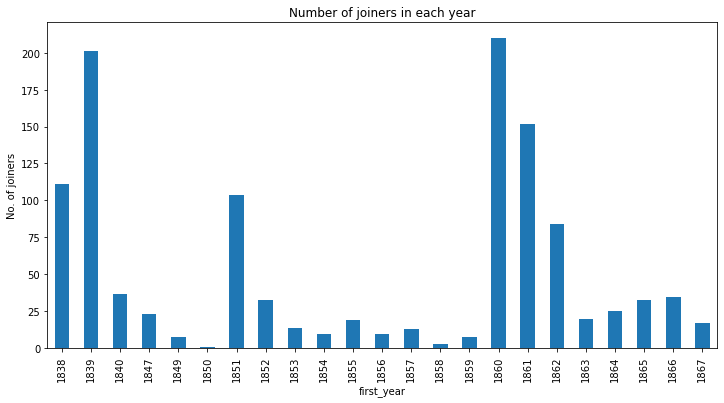

In [153]:
aps.groupby('first_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of joiners in each year")
plt.ylabel ("No. of joiners")
plt.show()

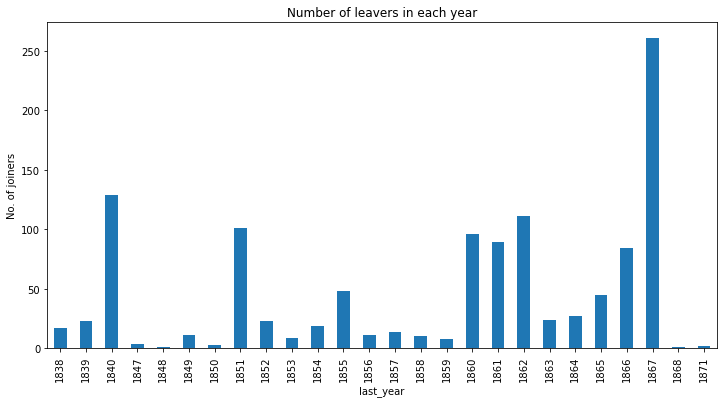

In [154]:
aps.groupby('last_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of leavers in each year")
plt.ylabel ("No. of joiners")
plt.show()

In [155]:
aps[(aps['first_year'] == 1837) & (aps['last_year'] == 1871)]

,Name,birth_year,death_year,first_year,last_year,religion_id


## The Ethnological Society of London (ESL) 1843 - 1871 ##

The Ethnological Society of London was the first intentionally academic society devoted to the discipline of anthropology in Britain. Secular by intent but if not always entirely so in its early years, it sought to be a place where those with a scientific interest in the field of ethnology could commune, share ideas and knowledge, and produce academic reports and hold academic meetings.  It met, performed its enquiries and reported its findings and recommendations to the Society’s members according to its own constitution (it usually met monthly). The Society’s remit, rules of engagement and characteristics were those of the many other scientific societies emerging at the time, its constitution being purposely compliant with BAAS requirements.  

In [156]:
esl = pd.read_csv ('vw_4_ceda_esl_quakers_202108162129.csv')

In [157]:
esl

,Name,birth_year,death_year,first_year,last_year,religion_id
0,William Adam,NaN,NaN,1844,1844,NaN
1,William (1) Adams,NaN,NaN,1844,1844,NaN
2,William (2) Adams,"1,820","1,900",1858,1871,NaN
3,Louis Agassiz,"1,807","1,873",1860,1871,NaN
4,Augustine Aglio,"1,777","1,857",1843,1845,NaN
...,...,...,...,...,...,...
743,James Wyld,"1,812","1,887",1844,1854,NaN
744,Ashton Yates,"1,781","1,863",1860,1862,NaN
745,W Holt Yates,"1,802","1,874",1844,1846,NaN
746,James Yearsley,"1,805","1,869",1845,1845,NaN


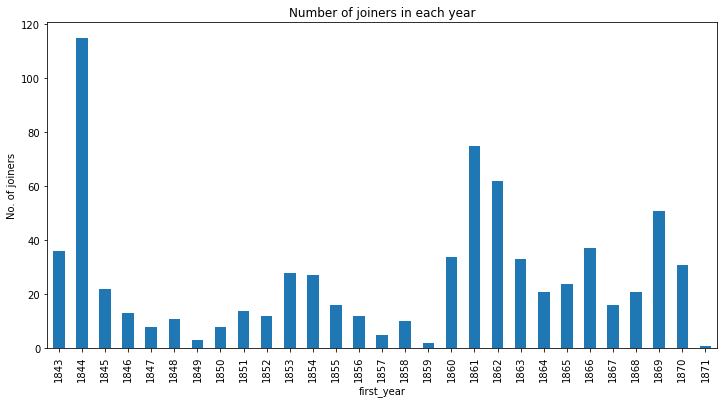

In [158]:
esl.groupby('first_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of joiners in each year")
plt.ylabel ("No. of joiners")
plt.show()

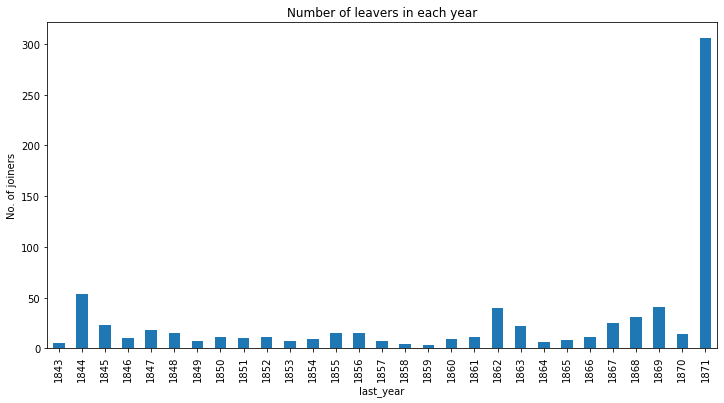

In [159]:
esl.groupby('last_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of leavers in each year")
plt.ylabel ("No. of joiners")
plt.show()

In [160]:
esl[(esl['first_year'] == 1843) & (esl['last_year'] == 1871)]

,Name,birth_year,death_year,first_year,last_year,religion_id


## The Anthropological Society of London (ASL) 1863 - 1871 ##

txt

In [161]:
asl = pd.read_csv ('vw_4_ceda_asl_quakers_202108162129.csv')

In [162]:
asl

,Name,birth_year,death_year,first_year,last_year,religion_id
0,Arthur William A Beckett,1844.0,1909.0,1864,1867,NaN
1,Andrew Mercer Adam,NaN,NaN,1865,1867,NaN
2,H R Adam,NaN,NaN,1870,1871,NaN
3,Henry John Adams,NaN,NaN,1864,1869,NaN
4,William Adlam,NaN,NaN,1863,1866,NaN
...,...,...,...,...,...,...
1329,Stephen Yeldham,1810.0,1896.0,1866,1869,NaN
1330,James A Youl,1811.0,1904.0,1864,1865,NaN
1331,Robert Younge,1801.0,1874.0,1865,1871,NaN
1332,Arthur de Zeltner,NaN,NaN,1866,1871,NaN


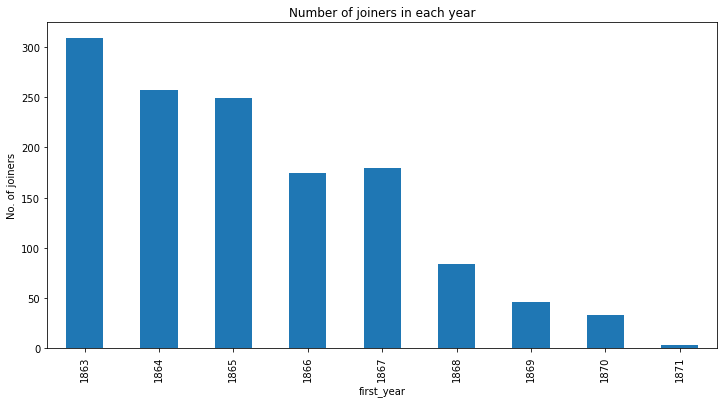

In [163]:
asl.groupby('first_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of joiners in each year")
plt.ylabel ("No. of joiners")
plt.show()

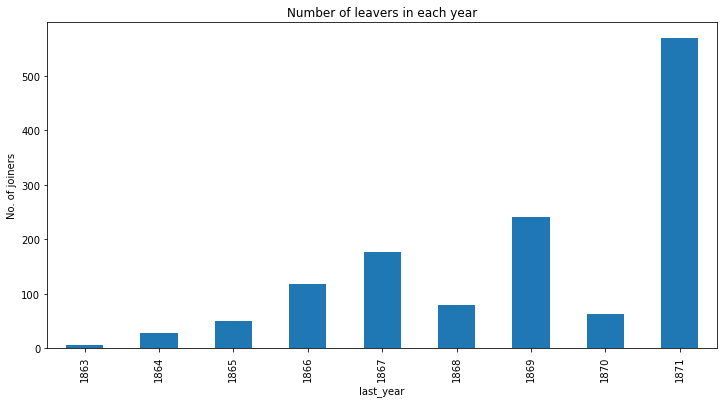

In [164]:
asl.groupby('last_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of leavers in each year")
plt.ylabel ("No. of joiners")
plt.show()

In [165]:
asl[(asl['first_year'] == 1863) & (asl['last_year'] == 1871)]

,Name,birth_year,death_year,first_year,last_year,religion_id
5,Louis Agassiz,1807.0,1873.0,1863,1871,NaN
40,Carl Ernst von Baer,1792.0,1876.0,1863,1871,NaN
53,William Roby Barr,1832.0,NaN,1863,1871,NaN
76,Thomas Bendyshe,1827.0,1886.0,1863,1871,NaN
119,Sydney Edward Bouverie Bouverie-Pusey,1839.0,1911.0,1863,1871,NaN
...,...,...,...,...,...,...
1296,J Spotswood Wilson,NaN,NaN,1863,1871,NaN
1317,William Spicer Wood,NaN,1902.0,1863,1871,1.0
1319,Robert Carr Woods,1816.0,1875.0,1863,1871,NaN
1320,Jens Jacob Asmussen Worsaae,1821.0,1885.0,1863,1871,NaN


## Anthropological Institute (AI) 1843 - 1871 ##

txt

In [166]:
ai = pd.read_csv ('vw_4_ceda_aps_quakers_202108161951.csv')

In [167]:
ai

,Name,birth_year,death_year,first_year,last_year,religion_id
0,William Aldam,1813.0,1890.0,1838,1848,1.0
1,Samuel C Baker,1821.0,1893.0,1839,1871,NaN
2,James Bell,1818.0,1872.0,1847,1862,1.0
3,John Bell (2),1811.0,1895.0,1838,1855,NaN
4,John Brown,1801.0,1879.0,1839,1839,NaN
...,...,...,...,...,...,...
1166,x Wright,NaN,NaN,1839,1850,NaN
1167,W Wrigley,NaN,NaN,1861,1862,NaN
1168,James Yates,NaN,NaN,1853,1856,NaN
1169,John Young,NaN,NaN,1840,1840,NaN


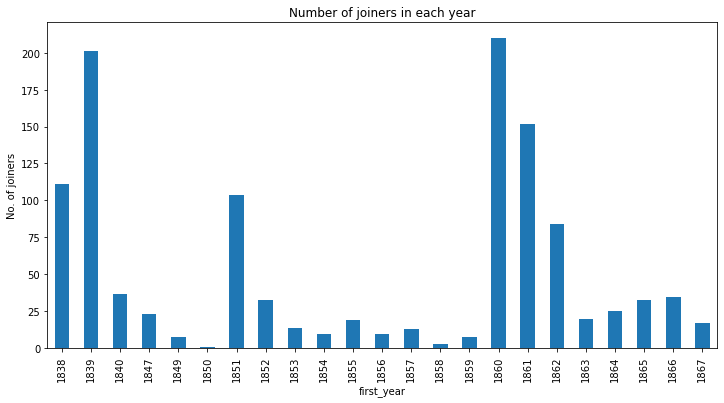

In [168]:
ai.groupby('first_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of joiners in each year")
plt.ylabel ("No. of joiners")
plt.show()

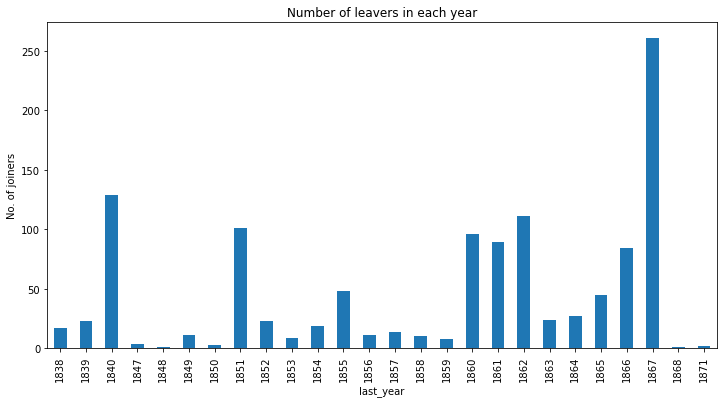

In [169]:
ai.groupby('last_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of leavers in each year")
plt.ylabel ("No. of joiners")
plt.show()

In [170]:
ai[(ai['first_year'] == 1843) & (ai['last_year'] == 1871)]

,Name,birth_year,death_year,first_year,last_year,religion_id


# The following code cells make a dynamic bigraph gexf output file of all CEDA data for Gephi #

### Goto Gephi and open project ceda_dynamic_edges.gexf ###

## This visualistaion shows all edges dynamically, to see all nodes visualised dynamically go to: ##

In [171]:
with open('vw_2_ceda_with_attributes_202108091312.csv', 'r') as nodecsv: # Open the Nodes csv file
    nodereader = csv.reader(nodecsv) # Read the csv
    nodes = [n for n in nodereader][1:]# Retrieve the data (using Python list comprhension and list slicing
                                       # to remove the header row
    node_names = [n[0] for n in nodes] # Get a list of only the node names

with open('vw_4_ceda_membership_dates_xid_202108091147.csv', 'r') as edgecsv: # Open the file
    edgereader = csv.reader(edgecsv) # Read the csv
    edge_list = list(edgereader) # Convert to list, so can iterate below in for loop
    
    # Create empty arrays to store edge data and edge attribute data
    edges = []
    edges_attributes = []
    
    # Fill the arrays with data from CSV
    for e in edge_list[1:]:
        edges.append(tuple(e[0:2])) # Get the first 2 columns (source, target) and add to array
        edges_attributes.append(tuple(e[2:4])) # Get the 3rd and 4th columns (first_year, last_year) and add to array
    
edge_names = [e[0] for e in edges] # Get a list of only the edge names   


In [172]:
print("Nodes length: ", len(node_names))
print("Edges length: ", len(edges))
print("Edges attributes length: ", len(edges_attributes)) # This should be the same length as edges


Nodes length:  3095
Edges length:  3894
Edges attributes length:  3894


In [173]:
print("First 5 nodes:", node_names[0:5])
print("First 5 edges:", edges[0:5])
print("First 5 edges attributes:", edges_attributes[0:5])

# The output will appear below this code cell.


First 5 nodes: ['Arthur William A Beckett', 'Andrew Mercer Adam', 'H R Adam', 'William Adam', 'Henry John Adams']
First 5 edges: [('William Adam', 'ESL'), ('William (1) Adams', 'ESL'), ('William (2) Adams', 'ESL'), ('Louis Agassiz', 'ESL'), ('Augustine Aglio', 'ESL')]
First 5 edges attributes: [('1844', '1844'), ('1844', '1844'), ('1858', '1871'), ('1860', '1871'), ('1843', '1845')]


In [174]:
G = nx.Graph()
G.add_nodes_from(node_names)
G.add_edges_from(edges)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 3100
Number of edges: 3894
Average degree:   2.5123


In [175]:
# Nodes

birth_year_dict = {}
death_year_dict = {}
religion_id_dict = {}

# Edges
first_year_dict = {}
last_year_dict = {}

In [176]:
for node in nodes: # Loop through the list, one row at a time
    
    birth_year_dict [node[0]] = node[1]
    death_year_dict [node[0]] = node[2]
    religion_id_dict[node[0]] = node[3]
    
   

In [177]:
for i, edge in enumerate(edges): # Loop through the list, one row at a time
    first_year_dict [(edge[0], edge[1])] = edges_attributes[i][0]
    last_year_dict [(edge[0], edge[1])] = edges_attributes[i][1]

In [184]:
#print(first_year_dict)# list Source, target and first_year (all records). This shows the data that will be exported to Gephi.
print(len(first_year_dict))# At the end of the file print a count of all first_year check 3946)

3894


In [179]:
# Nodes
nx.set_node_attributes(G, birth_year_dict, 'birth_year')
nx.set_node_attributes(G, death_year_dict, 'death_year')
nx.set_node_attributes(G, religion_id_dict, 'religion_id')

# Edges
nx.set_edge_attributes(G, first_year_dict, 'first_year')
nx.set_edge_attributes(G, last_year_dict, 'last_year')

In [186]:
#for n in G.nodes(): # Loop through every node, in our data "n" will be the name of the person
#    print(n, G.nodes[n]['birth_year']) # Access every node by its name, and then by the attribute "birth_year"

In [ ]:
nx.write_gexf(G, 'ceda_all_data.gexf')


# END #